In [1]:
import pandas as pd
import numpy as  np
import dask.dataframe as dd

In [2]:
df = pd.read_csv(r"C:\Users\user\MIMIC4\vitalsign.csv")
df = df.drop('past',axis=1)
df

,subject_id,hadm_id,stay_id,charttime,hr,rr,sbp,dbp,map,spo2,temp
0,10003700,28623837,30600691,2165-04-24 05:30:00,65.0,14.0,NaN,NaN,NaN,NaN,NaN
1,10003700,28623837,30600691,2165-04-24 06:00:00,56.0,14.0,126.0,78.0,88.0,100.0,NaN
2,10003700,28623837,30600691,2165-04-24 06:00:00,56.0,22.0,126.0,78.0,88.0,100.0,NaN
3,10003700,28623837,30600691,2165-04-24 06:09:00,55.0,14.0,NaN,NaN,NaN,100.0,NaN
4,10003700,28623837,30600691,2165-04-24 07:00:00,57.0,14.0,150.0,97.0,109.0,100.0,36.555556
...,...,...,...,...,...,...,...,...,...,...,...
11467910,19995244,27127412,37684913,2111-01-13 11:54:00,NaN,NaN,NaN,NaN,NaN,NaN,37.055556
11467911,19995244,27127412,37684913,2111-01-13 15:10:00,NaN,NaN,NaN,NaN,NaN,NaN,36.555556
11467912,19995244,27127412,37684913,2111-01-13 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,37.055556
11467913,19997448,23560173,33380030,2122-07-23 13:45:00,NaN,NaN,NaN,NaN,NaN,NaN,36.611111


In [3]:
df['charttime'] = pd.to_datetime(df['charttime'])
df = df.groupby([pd.Grouper(key = 'charttime', freq='1H'), 'stay_id']).mean().reset_index()
df

,charttime,stay_id,subject_id,hadm_id,hr,rr,sbp,dbp,map,spo2,temp
0,2110-01-11 12:00:00,30588857,18106347,24305596,93.500000,13.500000,114.0,72.500000,87.000000,99.500000,35.850000
1,2110-01-11 13:00:00,30588857,18106347,24305596,90.200000,12.000000,111.6,69.600000,84.400000,99.333333,NaN
2,2110-01-11 14:00:00,30588857,18106347,24305596,91.500000,20.000000,113.5,68.000000,82.000000,99.500000,NaN
3,2110-01-11 15:00:00,30588857,18106347,24305596,96.500000,14.000000,107.5,63.500000,77.000000,100.000000,NaN
4,2110-01-11 16:00:00,30588857,18106347,24305596,98.666667,14.666667,102.0,59.333333,72.333333,99.333333,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4611425,2211-11-10 12:00:00,36321770,16703369,27928947,NaN,NaN,103.0,53.000000,69.000000,NaN,36.833333
4611426,2211-11-10 20:00:00,36321770,16703369,27928947,NaN,NaN,132.0,59.000000,81.000000,NaN,37.388889
4611427,2211-11-11 00:00:00,36321770,16703369,27928947,NaN,NaN,124.0,57.000000,79.000000,NaN,36.833333
4611428,2211-11-11 08:00:00,36321770,16703369,27928947,80.000000,18.000000,124.0,64.000000,84.000000,94.000000,36.722222


In [4]:
age = pd.read_csv(r"C:\Users\user\Desktop\mimic-iv-1.0\core\patients.csv")
age = age.iloc[:,[0,2]]
df = pd.merge(df,age,how='left')
df

,charttime,stay_id,subject_id,hadm_id,hr,rr,sbp,dbp,map,spo2,temp,anchor_age
0,2110-01-11 12:00:00,30588857,18106347,24305596,93.500000,13.500000,114.0,72.500000,87.000000,99.500000,35.850000,48
1,2110-01-11 13:00:00,30588857,18106347,24305596,90.200000,12.000000,111.6,69.600000,84.400000,99.333333,NaN,48
2,2110-01-11 14:00:00,30588857,18106347,24305596,91.500000,20.000000,113.5,68.000000,82.000000,99.500000,NaN,48
3,2110-01-11 15:00:00,30588857,18106347,24305596,96.500000,14.000000,107.5,63.500000,77.000000,100.000000,NaN,48
4,2110-01-11 16:00:00,30588857,18106347,24305596,98.666667,14.666667,102.0,59.333333,72.333333,99.333333,NaN,48
...,...,...,...,...,...,...,...,...,...,...,...,...
4611425,2211-11-10 12:00:00,36321770,16703369,27928947,NaN,NaN,103.0,53.000000,69.000000,NaN,36.833333,69
4611426,2211-11-10 20:00:00,36321770,16703369,27928947,NaN,NaN,132.0,59.000000,81.000000,NaN,37.388889,69
4611427,2211-11-11 00:00:00,36321770,16703369,27928947,NaN,NaN,124.0,57.000000,79.000000,NaN,36.833333,69
4611428,2211-11-11 08:00:00,36321770,16703369,27928947,80.000000,18.000000,124.0,64.000000,84.000000,94.000000,36.722222,69


In [5]:
df['charttime'] = pd.to_datetime(df['charttime'])

In [6]:
df = df.groupby(['hadm_id','stay_id'],as_index=False)[['hr','rr','sbp','dbp','map','spo2','temp','anchor_age']].mean()
df

,hadm_id,stay_id,hr,rr,sbp,dbp,map,spo2,temp,anchor_age
0,20000094,35605481,124.000000,19.000000,78.600000,49.800000,57.600000,99.000000,36.666667,79
1,20000147,30503572,106.250000,26.000000,105.406250,60.236111,74.822917,96.500000,36.777778,71
2,20000351,30593599,88.666667,21.500000,99.333333,53.666667,98.500000,97.666667,37.111111,42
3,20000397,37640580,60.000000,14.250000,118.900000,85.200000,96.400000,96.375000,36.777778,61
4,20000808,30610654,84.121951,14.875000,129.797619,79.321429,93.571429,96.707317,37.277778,54
...,...,...,...,...,...,...,...,...,...,...
76275,29999186,32199257,91.547170,26.037037,113.230769,71.711538,81.830189,95.076923,37.833333,59
76276,29999444,31112026,121.885714,28.126761,134.808219,78.246575,91.246575,95.144928,37.111111,55
76277,29999498,33874605,98.555556,16.500000,144.857143,68.000000,86.607143,95.000000,37.111111,77
76278,29999625,36975675,86.404762,20.129505,129.691919,79.860750,95.974747,95.843333,37.360195,69


In [7]:
diagnosis = pd.read_csv(r"C:\Users\user\Desktop\mimic-iv-1.0\hosp\diagnoses_icd.csv")
diagnosis

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9
...,...,...,...,...,...
5280346,13747041,25594844,6,R531,10
5280347,13747041,25594844,8,R0902,10
5280348,13747041,25594844,4,F1120,10
5280349,13747041,25594844,2,J189,10


In [8]:
sepsis_code = diagnosis[diagnosis['icd_code'].isin(['99591','99592','78552','A419','R6520','R6521'])].drop_duplicates('hadm_id',keep='first')['hadm_id']
sepsis = df[df['hadm_id'].isin(sepsis_code)]
sepsis

,hadm_id,stay_id,hr,rr,sbp,dbp,map,spo2,temp,anchor_age
27,20003491,33494445,75.106383,22.413043,93.865385,60.403846,68.038462,95.711111,36.962963,50
29,20003587,34504641,92.042157,32.336275,99.687255,53.306863,64.532353,90.611111,35.277778,57
34,20004577,31836828,76.153846,14.692308,100.538462,62.000000,70.076923,96.846154,NaN,30
40,20005479,32977919,80.081633,20.187500,123.480000,47.120000,65.400000,96.102041,36.888889,84
42,20006154,30306704,68.724138,20.770115,115.011494,54.879310,76.310345,98.183908,36.888889,69
...,...,...,...,...,...,...,...,...,...,...
76239,29994296,34976235,75.800000,19.200000,116.764706,58.352941,72.058824,97.800000,36.092593,86
76240,29994310,38498660,73.537500,18.975000,98.155556,48.244444,59.491667,94.869565,37.916667,79
76255,29996606,34034988,93.318548,14.790323,102.382667,63.801333,72.122667,96.145161,36.541667,55
76256,29996630,32434045,65.142857,19.650000,106.528571,56.185714,68.555556,98.625000,36.950000,46


In [9]:
non_sepsis = diagnosis[diagnosis['hadm_id'].isin(sepsis_code)==False]
non_sepsis = non_sepsis['hadm_id'].drop_duplicates(keep='first')
non_sepsis = df[df['hadm_id'].isin(non_sepsis)]
non_sepsis

,hadm_id,stay_id,hr,rr,sbp,dbp,map,spo2,temp,anchor_age
0,20000094,35605481,124.000000,19.000000,78.600000,49.800000,57.600000,99.000000,36.666667,79
1,20000147,30503572,106.250000,26.000000,105.406250,60.236111,74.822917,96.500000,36.777778,71
2,20000351,30593599,88.666667,21.500000,99.333333,53.666667,98.500000,97.666667,37.111111,42
3,20000397,37640580,60.000000,14.250000,118.900000,85.200000,96.400000,96.375000,36.777778,61
4,20000808,30610654,84.121951,14.875000,129.797619,79.321429,93.571429,96.707317,37.277778,54
...,...,...,...,...,...,...,...,...,...,...
76274,29999098,33475199,77.935784,25.004902,156.324123,64.131140,92.071491,96.763807,37.760101,76
76275,29999186,32199257,91.547170,26.037037,113.230769,71.711538,81.830189,95.076923,37.833333,59
76277,29999498,33874605,98.555556,16.500000,144.857143,68.000000,86.607143,95.000000,37.111111,77
76278,29999625,36975675,86.404762,20.129505,129.691919,79.860750,95.974747,95.843333,37.360195,69


In [10]:
sepsis['sepsis'] = 1
non_sepsis['sepsis'] = 0

<ipython-input-10-66480508bfae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sepsis['sepsis'] = 1
<ipython-input-10-66480508bfae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_sepsis['sepsis'] = 0


In [11]:
non_sepsis = non_sepsis.sample(n=len(sepsis),random_state=42)

In [12]:
data = pd.concat([sepsis,non_sepsis])
data = data.iloc[:,2:len(data.columns)]
data = data.sample(frac=1).reset_index(drop=True)
data

,hr,rr,sbp,dbp,map,spo2,temp,anchor_age,sepsis
0,82.456897,15.836207,110.132812,61.314516,72.719136,97.250000,36.811111,46,0
1,68.285714,19.785714,119.931034,67.862069,80.103448,96.555556,36.833333,45,0
2,85.150000,20.475000,134.473684,61.947368,80.000000,96.656250,38.000000,81,0
3,56.000000,14.500000,98.652174,58.217391,68.130435,99.500000,36.775132,62,0
4,136.534884,25.095238,93.227273,51.204545,60.250000,98.348837,37.388889,33,0
...,...,...,...,...,...,...,...,...,...
24561,75.196721,15.271186,122.468750,66.789062,79.992188,99.542373,36.305556,50,1
24562,76.440000,16.940000,123.000000,80.592593,90.185185,99.653846,36.944444,45,0
24563,95.391803,23.280328,121.428299,58.123442,72.881694,95.990000,37.143965,76,1
24564,98.868421,17.307692,107.350000,53.412500,69.953488,97.000000,36.657407,71,1


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split

X  = data.iloc[:,0:len(data.columns)-1]
y = data.iloc[:,[-1]]
y = y.values.ravel()

In [14]:
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state = 42)

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

roc = cross_val_score(lgbm_wrapper, X, y, cv= 5, scoring="roc_auc") 
print("lgbm ROC-AUC Score : {}".format(np.mean(roc)))
accuracy = cross_val_score(lgbm_wrapper, X, y, cv= 5, scoring="accuracy") 
print("lgbm accuracy Score : {}".format(np.mean(accuracy)))

lgbm ROC-AUC Score : 0.7194088873838217
lgbm accuracy Score : 0.6642923208972467


In [16]:
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train,y_train, early_stopping_rounds = 100, eval_metric='logloss', eval_set=evals, verbose=True)

pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.681458
[2]	valid_0's binary_logloss: 0.670891
[3]	valid_0's binary_logloss: 0.662558
[4]	valid_0's binary_logloss: 0.655522
[5]	valid_0's binary_logloss: 0.649819
[6]	valid_0's binary_logloss: 0.644848
[7]	valid_0's binary_logloss: 0.640151
[8]	valid_0's binary_logloss: 0.636583
[9]	valid_0's binary_logloss: 0.633039
[10]	valid_0's binary_logloss: 0.63026
[11]	valid_0's binary_logloss: 0.627878
[12]	valid_0's binary_logloss: 0.625204
[13]	valid_0's binary_logloss: 0.623177
[14]	valid_0's binary_logloss: 0.622088
[15]	valid_0's binary_logloss: 0.620521
[16]	valid_0's binary_logloss: 0.619446
[17]	valid_0's binary_logloss: 0.618189
[18]	valid_0's binary_logloss: 0.617428
[19]	valid_0's binary_logloss: 0.616343
[20]	valid_0's binary_logloss: 0.615543
[21]	valid_0's binary_logloss: 0.614891
[22]	valid_0's binary_logloss: 0.614346
[23]	valid_0's binary_logloss: 0.614202
[24]	valid_0's binary_logloss: 0.613803
[25]	valid_0's binary_logloss: 0.613357
[26]	valid

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[124]	valid_0's binary_logloss: 0.611791
[125]	valid_0's binary_logloss: 0.611964
[126]	valid_0's binary_logloss: 0.612123
[127]	valid_0's binary_logloss: 0.612058
[128]	valid_0's binary_logloss: 0.612085
[129]	valid_0's binary_logloss: 0.612147
[130]	valid_0's binary_logloss: 0.612123
[131]	valid_0's binary_logloss: 0.612214
[132]	valid_0's binary_logloss: 0.612228
[133]	valid_0's binary_logloss: 0.612202
[134]	valid_0's binary_logloss: 0.612219
[135]	valid_0's binary_logloss: 0.612421
[136]	valid_0's binary_logloss: 0.612573
[137]	valid_0's binary_logloss: 0.612687
[138]	valid_0's binary_logloss: 0.612796
[139]	valid_0's binary_logloss: 0.61282
[140]	valid_0's binary_logloss: 0.613225
[141]	valid_0's binary_logloss: 0.613123
[142]	valid_0's binary_logloss: 0.613108
[143]	valid_0's binary_logloss: 0.613035
[144]	valid_0's binary_logloss: 0.613512
[145]	valid_0's binary_logloss: 0.613498
[146]	valid_0's binary_logloss: 0.613368
[147]	valid_0's binary_logloss: 0.613348
[148]	valid_0's b

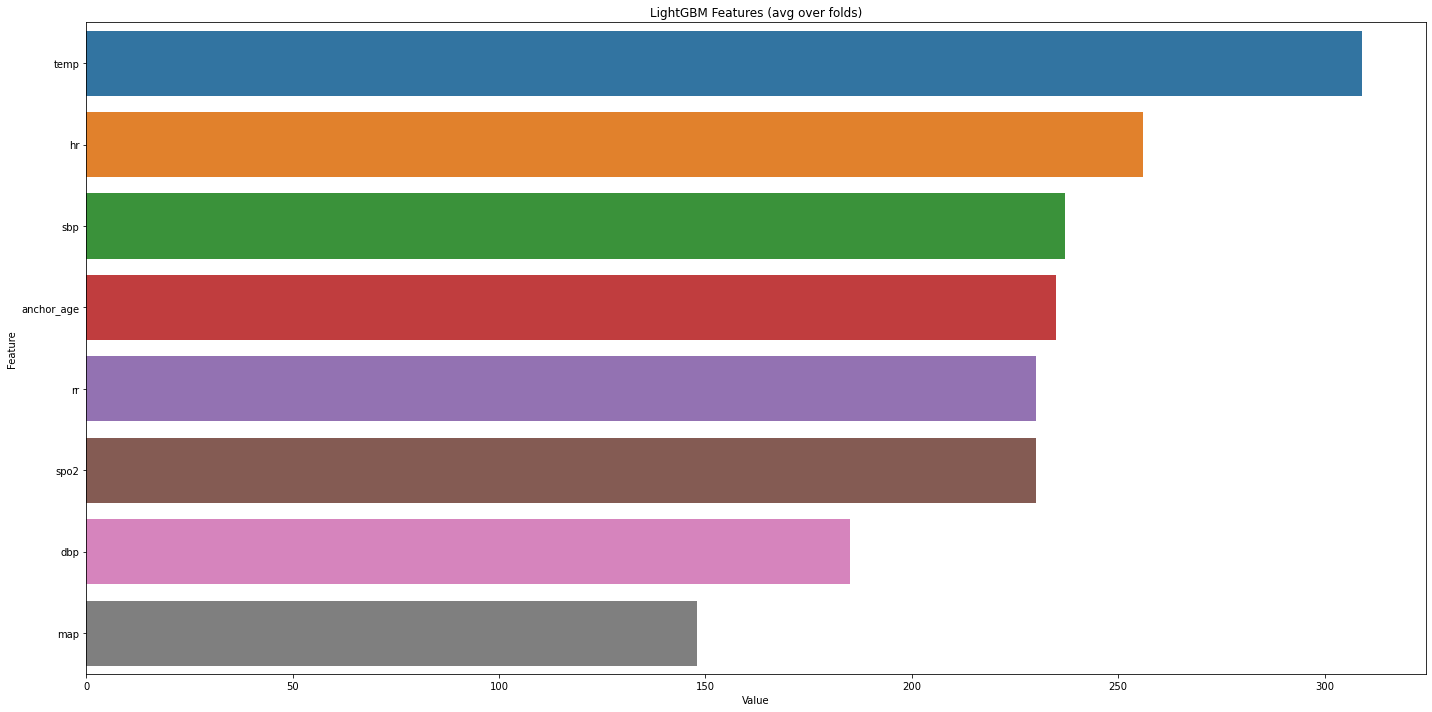

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

feature_imp = pd.DataFrame(sorted(zip(lgbm_wrapper.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [18]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    AUC = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('ROC_AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, pred)

오차행렬:
 [[769 463]
 [347 878]]

정확도: 0.6703
정밀도: 0.6547
재현율: 0.7167
F1: 0.6843
ROC_AUC: 0.7298
